<a href="https://colab.research.google.com/github/khyatinagaria/plant_disease_streamlit/blob/master/plantdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [ ]:
import os
train_dir = os.path.join(path,"New Plant Diseases Dataset(Augmented)","New Plant Diseases Dataset(Augmented)","train")
valid_dir = os.path.join(path,"New Plant Diseases Dataset(Augmented)","New Plant Diseases Dataset(Augmented)","valid")
test_dir = os.path.join(path,"New Plant Diseases Dataset(Augmented)","New Plant Diseases Dataset(Augmented)","test")

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[154.75 148.75 160.75]
   [125.5  119.5  131.5 ]
   [165.   159.   171.  ]
   ...
   [148.75 140.75 151.75]
   [156.25 148.25 159.25]
   [130.   122.   133.  ]]

  [[141.   135.   147.  ]
   [141.75 135.75 147.75]
   [149.5  143.5  155.5 ]
   ...
   [159.25 151.25 162.25]
   [168.5  160.5  171.5 ]
   [119.75 111.75 122.75]]

  [[138.75 132.75 144.75]
   [164.75 158.75 170.75]
   [150.25 144.25 156.25]
   ...
   [158.25 150.25 161.25]
   [137.   129.   140.  ]
   [180.75 172.75 183.75]]

  ...

  [[149.75 139.75 147.75]
   [166.75 156.75 164.75]
   [157.   147.   155.  ]
   ...
   [138.75 127.75 135.75]
   [106.75  95.75 103.75]
   [130.5  119.5  127.5 ]]

  [[154.5  144.5  152.5 ]
   [154.25 144.25 152.25]
   [166.5  156.5  164.5 ]
   ...
   [133.75 122.75 130.75]
   [144.   133.   141.  ]
   [118.75 107.75 115.75]]

  [[157.75 147.75 155.75]
   [165.   155.   163.  ]
   [167.25 157.25 165.25]
   ...
   [115.   104.   112.  ]
   [106.5   95.5  103.5 ]
   [147.75 136.75 14

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 349s 152ms/step - accuracy: 0.3868 - loss: 2.1864 - val_accuracy: 0.8375 - val_loss: 0.5119
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 172s 62ms/step - accuracy: 0.8405 - loss: 0.5085 - val_accuracy: 0.8988 - val_loss: 0.3190
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9102 - loss: 0.2791 - val_accuracy: 0.9365 - val_loss: 0.1985
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9377 - loss: 0.1929 - val_accuracy: 0.9372 - val_loss: 0.1979
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9527 - loss: 0.1416 - val_accuracy: 0.9511 - val_loss: 0.1600
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9625 - loss: 0.1140 - val_accuracy: 0.9450 - val_loss: 0.1724
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9696 - loss: 0.0899 - val_accuracy: 0.9602 - val_loss: 0.1282
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy:

In [ ]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 71s 32ms/step - accuracy: 0.9861 - loss: 0.0394


In [ ]:
print(train_loss,train_acc)

0.037932299077510834 0.9870545268058777


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 29ms/step - accuracy: 0.9588 - loss: 0.1506


In [ ]:
print(val_loss,val_acc)

0.14365921914577484 0.9591964483261108


In [ ]:
model.save("trained_model.keras") #it reduced the size of saved file which is good for us

In [ ]:
training_history.history

{'accuracy': [0.5916494727134705,
  0.8602887988090515,
  0.9161818027496338,
  0.9407639503479004,
  0.9560850858688354,
  0.9647343158721924,
  0.9716907143592834,
  0.9754036664962769,
  0.9796144962310791,
  0.9827868342399597],
 'loss': [1.3898369073867798,
  0.4425128996372223,
  0.25835567712783813,
  0.1803336888551712,
  0.1368226259946823,
  0.10683523863554001,
  0.0856478214263916,
  0.07426448911428452,
  0.06461557745933533,
  0.05496889352798462],
 'val_accuracy': [0.8375256061553955,
  0.8987593650817871,
  0.9364898800849915,
  0.9371727705001831,
  0.9510585069656372,
  0.9449692964553833,
  0.9601638913154602,
  0.9606760740280151,
  0.965228796005249,
  0.9591964483261108],
 'val_loss': [0.5119338035583496,
  0.31901389360427856,
  0.19845782220363617,
  0.19788211584091187,
  0.16003654897212982,
  0.1724330484867096,
  0.12821821868419647,
  0.13873130083084106,
  0.11182575672864914,
  0.14365945756435394]}

In [ ]:
#Recording History in json file training_his(name is given by us)
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.8375256061553955,
 0.8987593650817871,
 0.9364898800849915,
 0.9371727705001831,
 0.9510585069656372,
 0.9449692964553833,
 0.9601638913154602,
 0.9606760740280151,
 0.965228796005249,
 0.9591964483261108]

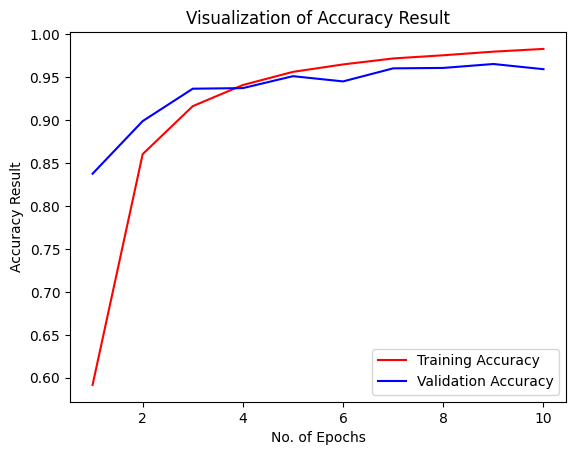

In [ ]:
epochs = [i for i in range(1,11)] # from 1 to 10
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,            #to pass all the labels sequentially
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step


(array([[9.99914408e-01, 8.25549141e-05, 7.13089310e-10, ...,
         6.54376117e-14, 8.26315752e-12, 4.92602270e-12],
        [9.96653438e-01, 3.09936213e-03, 7.23978477e-09, ...,
         2.17727780e-11, 8.05317479e-11, 1.05768186e-10],
        [9.99999404e-01, 5.90035292e-08, 1.33919351e-12, ...,
         6.97047367e-17, 1.63516068e-14, 1.42541374e-13],
        ...,
        [1.15187795e-05, 1.60183106e-07, 2.07503399e-05, ...,
         1.29229793e-05, 2.09455393e-07, 9.94941771e-01],
        [1.76421254e-05, 7.95351980e-08, 1.51679400e-04, ...,
         3.22575033e-05, 9.47570129e-07, 9.98139024e-01],
        [1.14808729e-13, 3.66985495e-15, 1.21979738e-12, ...,
         1.05736461e-10, 4.90318168e-11, 9.99070048e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0) #axis = 0 means we have to perform function row wise
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)  #axis = 1 means we have to perform function column wise
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.96       440
                                   Apple___healthy       0.98      0.94      0.96       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.99      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.98      0.91       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.90      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[487,   1,   0, ...,   0,   0,   0],
       [  1, 481,   0, ...,   0,   0,   0],
       [  0,   0, 417, ...,   2,   0,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   1, 432,   0],
       [  2,   0,   1, ...,   0,   0, 434]])

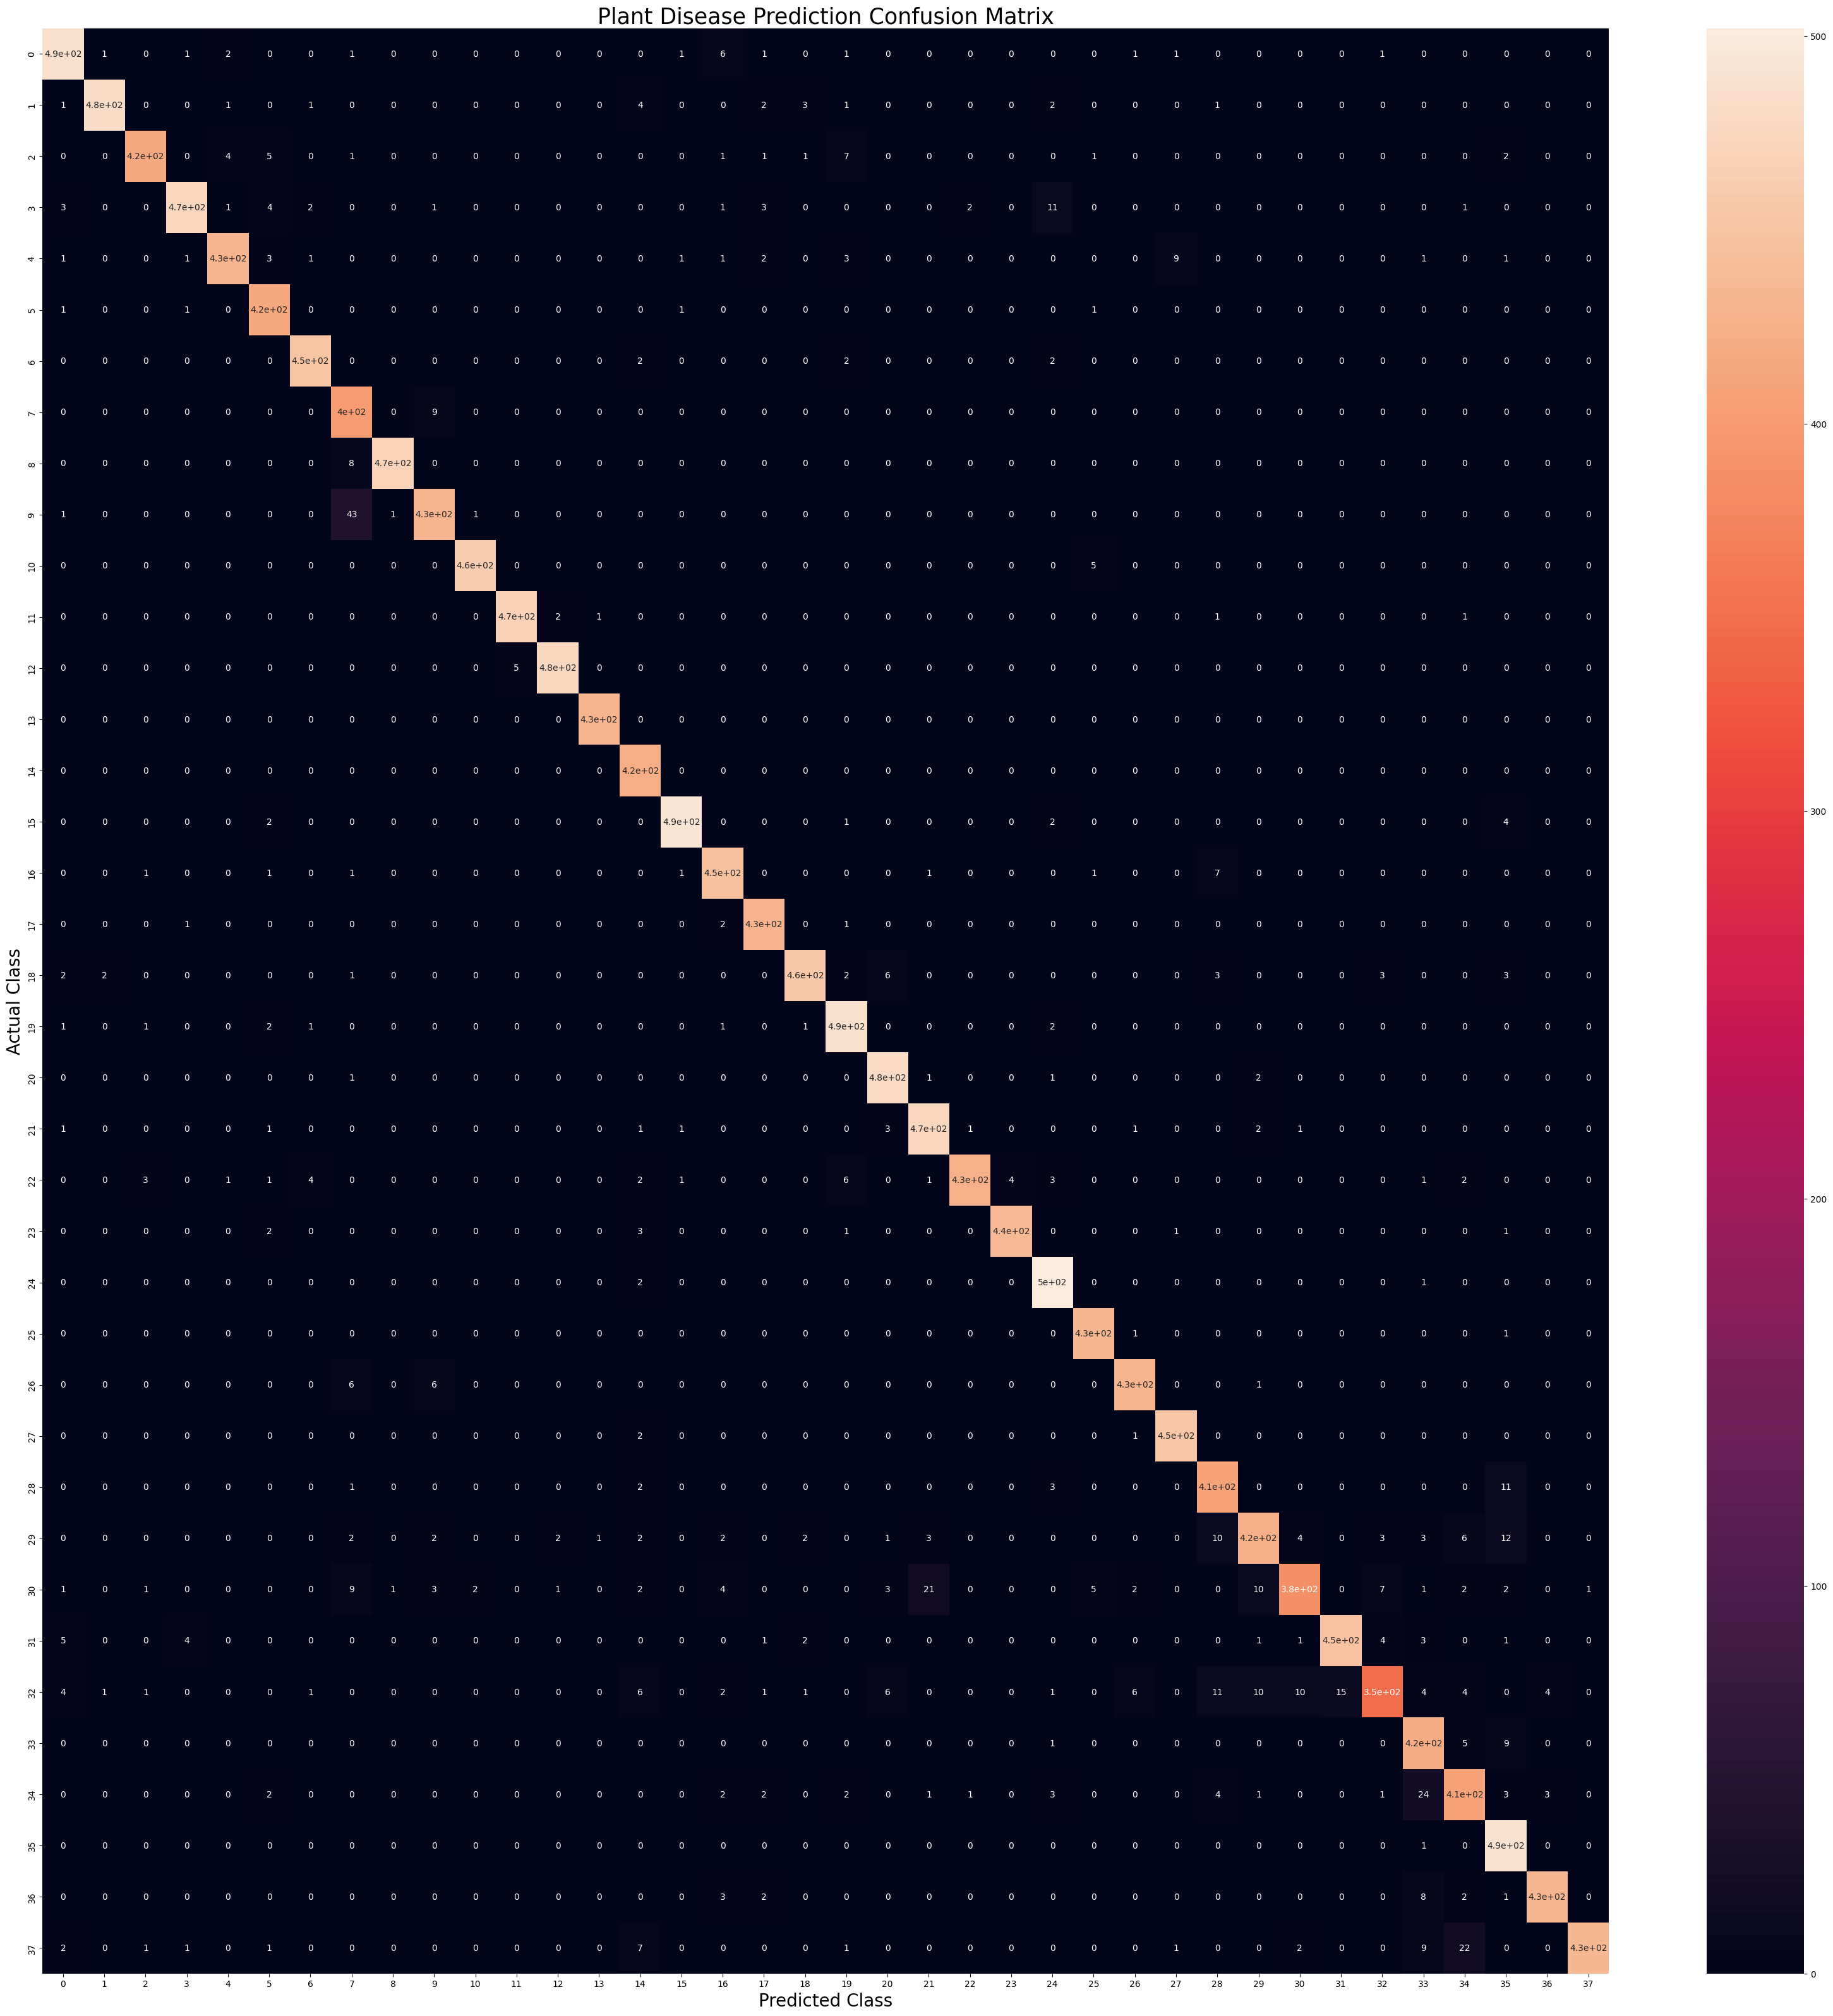

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()